<a href="https://colab.research.google.com/github/mehdiaraghi/mehdiaraghi/blob/master/Deep_learning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#importing dataset
(X_train,y_train), (X_test, y_test) = mnist.load_data()

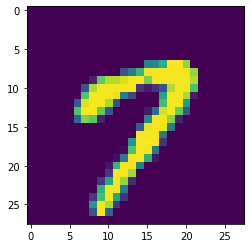

In [12]:
#plotting one sample
plt.imshow(X_train[15])


In [14]:
#reshapping data input & normalizing the input
X_train = (X_train.reshape(X_train.shape[0], 28,28,1).astype('float32'))/255
X_test = (X_test.reshape(X_test.shape[0], 28,28,1).astype('float32'))/255

In [15]:
#converting y labels to categories
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#number of cagtegories
num_class =y_train.shape[1]

In [16]:
#defining deep learning calassification model

def classification_model ():
  #create model
  model = Sequential()

  #create Convolational layers
  model.add(Conv2D(32, (5,5) , strides=(1,1), activation = 'relu' , input_shape = (28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Conv2D(16, (2,2) , strides=(1,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  #Flatten Covolotional layers output
  model.add(Flatten())
  
  #add a deep learning layer
  model.add(Dense(100, activation = 'relu'))
  
  #add out put 
  model.add(Dense(num_class, activation = 'softmax'))
  
  #compiling model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [17]:
model = classification_model()

model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs= 10, batch_size = 200, verbose = 2)

Epoch 1/10
300/300 - 33s - loss: 1.2827 - accuracy: 0.5897 - val_loss: 0.5257 - val_accuracy: 0.8397 - 33s/epoch - 109ms/step
Epoch 2/10
300/300 - 30s - loss: 0.4579 - accuracy: 0.8618 - val_loss: 0.3885 - val_accuracy: 0.8829 - 30s/epoch - 99ms/step
Epoch 3/10
300/300 - 30s - loss: 0.3775 - accuracy: 0.8833 - val_loss: 0.3323 - val_accuracy: 0.8976 - 30s/epoch - 99ms/step
Epoch 4/10
300/300 - 32s - loss: 0.3305 - accuracy: 0.8985 - val_loss: 0.2944 - val_accuracy: 0.9105 - 32s/epoch - 106ms/step
Epoch 5/10
300/300 - 30s - loss: 0.2921 - accuracy: 0.9113 - val_loss: 0.2658 - val_accuracy: 0.9161 - 30s/epoch - 100ms/step
Epoch 6/10
300/300 - 30s - loss: 0.2633 - accuracy: 0.9192 - val_loss: 0.2378 - val_accuracy: 0.9262 - 30s/epoch - 100ms/step
Epoch 7/10
300/300 - 31s - loss: 0.2376 - accuracy: 0.9277 - val_loss: 0.2073 - val_accuracy: 0.9359 - 31s/epoch - 103ms/step
Epoch 8/10
300/300 - 31s - loss: 0.2152 - accuracy: 0.9353 - val_loss: 0.1895 - val_accuracy: 0.9423 - 31s/epoch - 104ms

In [ ]:
scores = model.evaluate(X_test,y_test,verbose=2)

313/313 - 2s - loss: 0.0349 - accuracy: 0.9877 - 2s/epoch - 7ms/step


In [ ]:
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9876999855041504 
 Error: 1.230001449584961
